# 🎧 YouTube Audio MFCC Visualization in Python
This notebook downloads a YouTube video, extracts audio, converts it to WAV, extracts MFCC features, and plots them.

In [1]:
# ✅ Step 1: Install required libraries
!pip install yt-dlp librosa matplotlib

  Using cached yt_dlp-2025.6.30-py3-none-any.whl.metadata (174 kB)
Using cached yt_dlp-2025.6.30-py3-none-any.whl (3.3 MB)


In [3]:
# ✅ Step 2: Download audio from YouTube
import sys
import subprocess

# Replace this with any public YouTube video URL
url = 'https://www.youtube.com/watch?v=Zi_XLOBDo_Y'  # Michael Jackson - Billie Jean

subprocess.run([sys.executable, '-m', 'yt_dlp',
                '-x', '--audio-format', 'wav',
                '-o', '%(title)s.%(ext)s',
                url])

CompletedProcess(args=['C:\\Users\\HasanShahriare\\anaconda3\\python.exe', '-m', 'yt_dlp', '-x', '--audio-format', 'wav', '-o', '%(title)s.%(ext)s', 'https://www.youtube.com/watch?v=Zi_XLOBDo_Y'], returncode=0)

In [7]:
# ✅ Step 3: Load and process audio
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the generated WAV file
file_path = 'mj.wav'  # Update if needed
y, sr = librosa.load(file_path)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

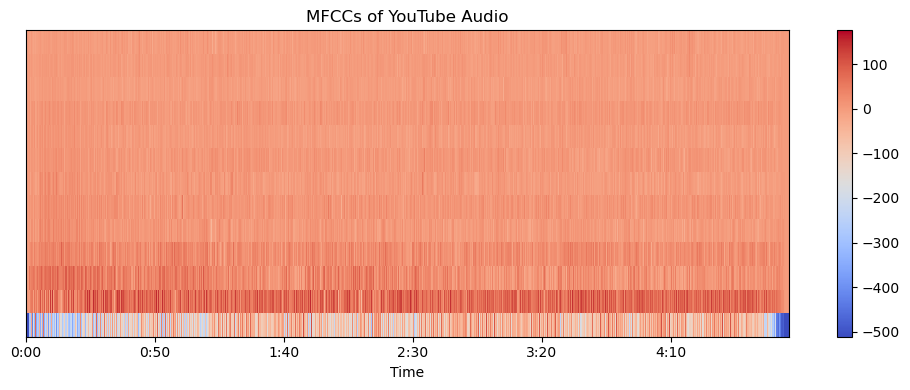

In [9]:
# ✅ Step 4: Visualize MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCCs of YouTube Audio')
plt.tight_layout()
plt.show()

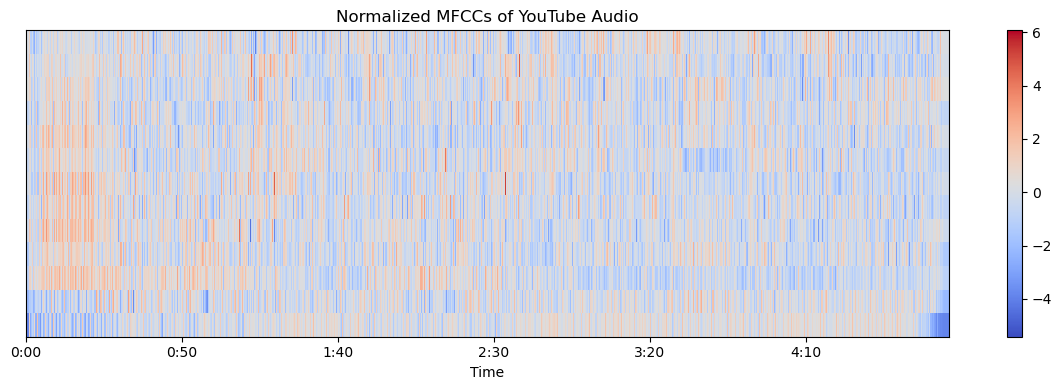

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio
y, sr = librosa.load("mj.wav")

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Normalize MFCCs
mfccs_norm = (mfccs - np.mean(mfccs, axis=1, keepdims=True)) / np.std(mfccs, axis=1, keepdims=True)

# Visualize
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs_norm, x_axis='time', sr=sr)
plt.colorbar()
plt.title("Normalized MFCCs of YouTube Audio")
plt.tight_layout()
plt.savefig("normalized_mfccs.png")
plt.show()
